$dn_k/dt = 0.5 \sum_{i+j=k} A_{ij} n_i n_j - n_k \sum_i A_{ki} n_i$  <br>
$n_1(t=0) = 200$ <br>
$A = 0.001$ <br>
$dn_k = [0.5 \sum_{i+j=k} A_{ij} n_i n_j - n_k \sum_i A_{ki} n_i ] dt$ <br>
$n_{kf} - n_{k0} = [0.5 \sum_{i+j=k} A_{ij} n_i n_j - n_k \sum_i A_{ki} n_i ](t_f - t_0) $ <br>
$n_{kf} = [0.5 \sum_{i+j=k} A_{ij} n_i n_j - n_k \sum_i A_{ki} n_i ](t_f - t_0) + n_{k0} $ <br>

In [1]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.style.use('./accretion.mplstyle')
import numpy as np

In [2]:
def pebble_in(n_k,k):
    A = 0.001
    total = 0
    if k==1:
        return 0
    else:
        double_count=0
        for i in range(1,k):
            for j in range(1,k):
                if i==j and double_count>0:
                    continue
                if i+j==k:
                    total += A * n_k[i-1] * n_k[j-1]
                    if i==j:
                        double_count+=1
    return total

def pebble_out(n_k):
    A = 0.001
    total = sum([A * n for n in n_k])
    return total

def planetesimals(ts,ks):
    ks = range(1,max(ks)+1)
    A = 0.001
    n_k = np.zeros(max(ks),dtype=np.float128)
    n_k[0] = 200
    n_k_rows = np.zeros((len(ts)+1,max(ks)),dtype=np.float128)
    n_k_rows[0]=n_k
    for t,time in enumerate(ts):    
        n_k_new = np.zeros(max(ks),dtype=np.float128)
        t_final = time     
        if t==0:
            t_initial = 0
        else:     
            t_initial = ts[t-1]
        dt = t_final-t_initial      
        for k in ks:
            n_k_initial = n_k_rows[t][k-1]   
            n_k_final = ((0.5*pebble_in(n_k_rows[t],k) - n_k_initial*pebble_out(n_k_rows[t])))*dt+n_k_initial
            n_k_new[k-1]=n_k_final
        n_k_rows[t+1]=n_k_new
    return n_k_rows

timescale = [1,2,3]
ks = list(range(1,9))
n_k_rows = planetesimals(timescale,ks)

print(f'Total Planetesimals\t\tn_k(t)')
for row in n_k_rows:
    total = 0
    for i,val in enumerate(row):
        total += (i+1)*val
    print(f'\t{total}\t{row}')

Total Planetesimals		n_k(t)
	200.0	[200.   0.   0.   0.   0.   0.   0.   0.]
	200.0	[160.  20.   0.   0.   0.   0.   0.   0.]
	200.0	[131.2  29.2   3.2   0.2   0.    0.    0.    0. ]
	200.0	[1.0970944e+02 3.3023760e+01 6.5068800e+00 1.0134000e+00 1.1968000e-01
 1.0960000e-02 6.4000000e-04 2.0000000e-05]


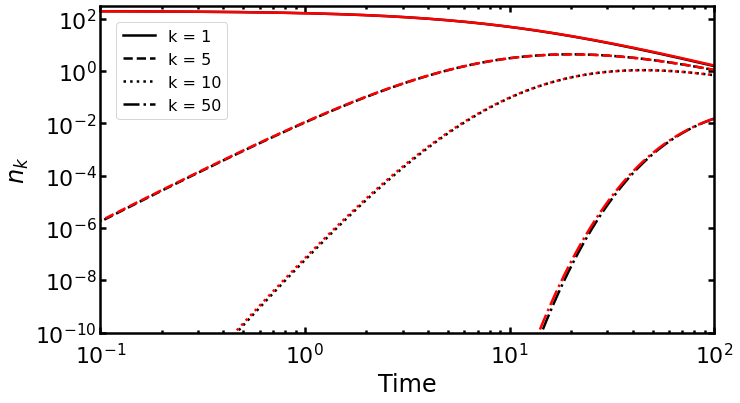

In [3]:
def f_function(t,A=0.001,n_1_t0=200):
    f_value = (1+A*t*n_1_t0/2)**-1
    return f_value

def n_k_analytic(k,t,n_1_t0=200):
    n_k = n_1_t0 * f_function(t)**2 * (1-f_function(t))**(k-1)
    return n_k

lines = ["-","--",":","-."]
linecycler = cycle(lines)
timescale=np.logspace(-2,2,500)
ks = [1,5,10,50]
max_ks = [1,200]
n_k = planetesimals(timescale,max_ks)
timescale = np.insert(timescale,0,0)
for k in ks:
    y_a = n_k_analytic(k,timescale)
    y_n = n_k[:,k-1]
    x = timescale
    line=next(linecycler)
    plt.plot(x,y_n,color='black',linestyle=line,label=f'k = {k}')
    plt.plot(x,y_a,color='red',linestyle=line)
plt.ylabel(r'$n_k$')
plt.xlabel('Time')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-10,300)
plt.xlim(0.1,100)
plt.legend()
plt.show()

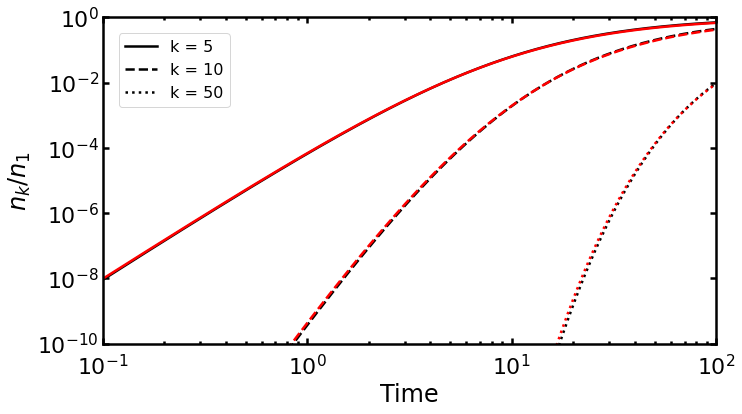

In [4]:
timescale=np.logspace(-2,2,500)
ks = [5,10,50]
max_ks = [1,200]
n_k = planetesimals(timescale,max_ks)
timescale = np.insert(timescale,0,0)
for k in ks:
    y_a = n_k_analytic(k,timescale)/n_k_analytic(1,timescale)
    y_n = n_k[:,k-1]/n_k[:,0]
    x = timescale
    line=next(linecycler)
    plt.plot(x,y_n,color='black',linestyle=line,label=f'k = {k}')
    plt.plot(x,y_a,color='red',linestyle=line)
plt.ylabel(r'$n_k / n_1$')
plt.xlabel('Time')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-10,1)
plt.xlim(0.1,100)
plt.legend()
plt.show()

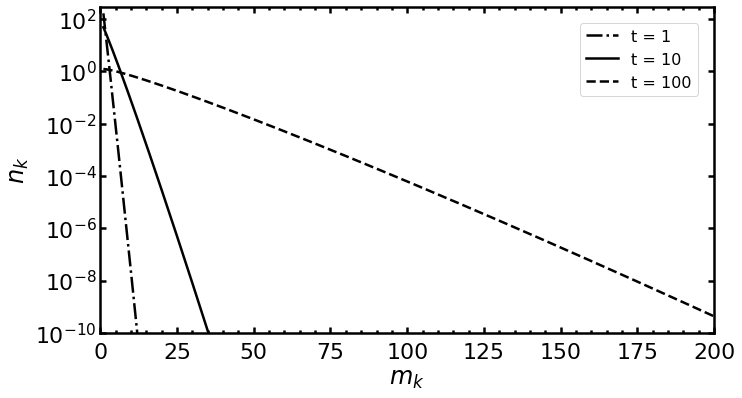

In [5]:
timescale=np.logspace(-2,2,100)
ts = [1,10,100]
max_ks = [1,200]
n_k = planetesimals(timescale,max_ks)
timescale = np.insert(timescale,0,0)
a=timescale
for t in ts:
    j=min(range(len(a)), key=lambda i: abs(a[i]-t))
    y = n_k[j,:]
    x = list(range(1,201))
    # x = [val*(i+1) for i,val in enumerate(n_k[j,:])]
    line=next(linecycler)
    plt.plot(x,y,label=f't = {t}',linestyle=line,color='black')
plt.ylabel(r'$n_k$')
plt.xlabel(r'$m_k$')
# plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-10,300)
plt.xlim(0,200)
plt.legend()
plt.show()

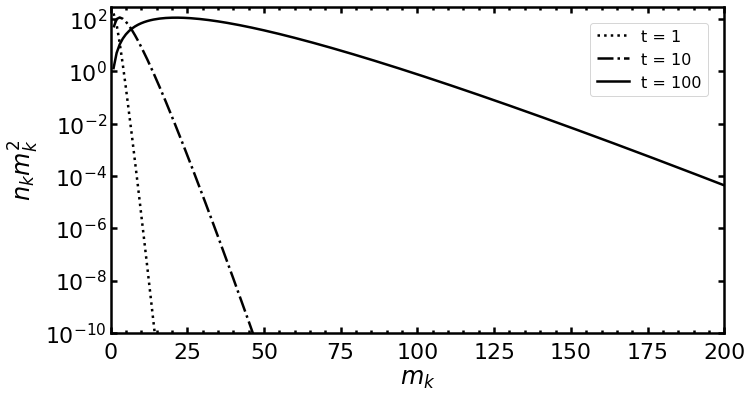

In [6]:
timescale=np.logspace(-1,2,100)
ts = [1,10,100]
max_ks = [1,200]
n_k = planetesimals(timescale,max_ks)
a = np.insert(timescale,0,0)
for t in ts:
    j=min(range(len(a)), key=lambda i: abs(a[i]-t))
    # y = n_k[j,:]*[val*(i+1)**2 for i,val in enumerate(n_k[j,:])]
    x = list(range(1,201))
    y = n_k[j,:]*[i**2 for i in x]
    # x = [val*(i+1) for i,val in enumerate(n_k[j,:])]
    line=next(linecycler)
    plt.plot(x,y,label=f't = {t}',linestyle=line,color='black')
plt.ylabel(r'$n_k m_k^2$')
plt.xlabel(r'$m_k$')
# plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-10,300)
plt.xlim(0,200)
plt.legend()
plt.show()

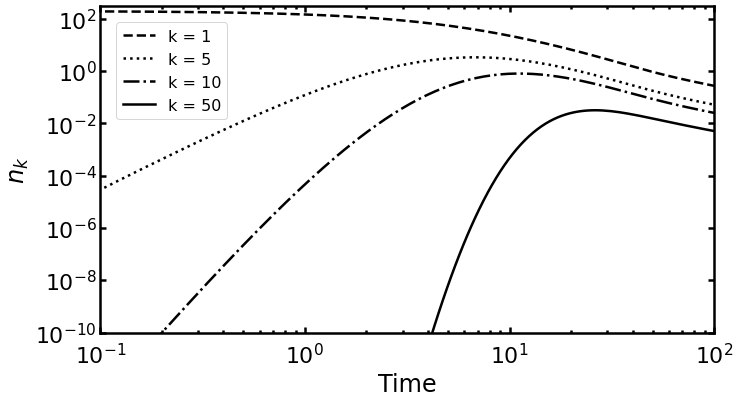

In [7]:
def pebble_in_A(n_k,k):
    A1 = 0.001
    total = 0
    if k==1:
        return 0
    else:
        double_count=0
        for i in range(1,k):
            for j in range(1,k):
                if i==j and double_count>0:
                    continue
                if i+j==k:
                    A = A1 * k**(2/3)
                    total += A * n_k[i-1] * n_k[j-1]
                    if i==j:
                        double_count+=1
    return total

def pebble_out_A(n_k,k):
    A1 = 0.001
    total = sum([A1 * (k+i+1)**(2/3) * n for i,n in enumerate(n_k)])
    return total

def planetesimals_A(ts,ks):
    ks = range(1,max(ks)+1)
    n_k = np.zeros(max(ks),dtype=np.float128)
    n_k[0] = 200
    n_k_rows = np.zeros((len(ts)+1,max(ks)),dtype=np.float128)
    n_k_rows[0]=n_k
    for t,time in enumerate(ts):    
        n_k_new = np.zeros(max(ks),dtype=np.float128)
        t_final = time     
        if t==0:
            t_initial = 0
        else:     
            t_initial = ts[t-1]
        dt = t_final-t_initial      
        for k in ks:
            n_k_initial = n_k_rows[t][k-1]   
            n_k_final = ((0.5*pebble_in_A(n_k_rows[t],k) - n_k_initial*pebble_out_A(n_k_rows[t],k)))*dt+n_k_initial
            n_k_new[k-1]=n_k_final
        n_k_rows[t+1]=n_k_new
    return n_k_rows

timescale=np.logspace(-2,2,200)
ks = [1,5,10,50]
max_ks = [1,200]
n_k = planetesimals_A(timescale,max_ks)
timescale = np.insert(timescale,0,0)
for k in ks:
    y_n = n_k[:,k-1]
    x = timescale
    line=next(linecycler)
    plt.plot(x,y_n,color='black',linestyle=line,label=f'k = {k}')
plt.ylabel(r'$n_k$')
plt.xlabel('Time')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-10,300)
plt.xlim(0.1,100)
plt.legend()
plt.show()

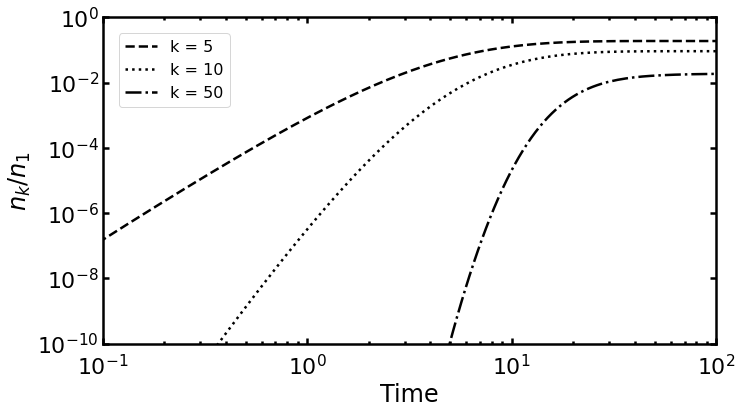

In [8]:
timescale=np.logspace(-2,2,200)
ks = [5,10,50]
max_ks = [1,200]
n_k = planetesimals_A(timescale,max_ks)
timescale = np.insert(timescale,0,0)
for k in ks:
    y_n = n_k[:,k-1]/n_k[:,0]
    x = timescale
    line=next(linecycler)
    plt.plot(x,y_n,color='black',linestyle=line,label=f'k = {k}')
plt.ylabel(r'$n_k/n_1$')
plt.xlabel('Time')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-10,1)
plt.xlim(0.1,100)
plt.legend()
plt.show()